# MIS373 - AI For Business - Assignment 2

## Task 2 - Weather Phenomenon Recognition

**Student Name:** Lexi Nguyen

**Student ID:** 222363222

## Table of Content

1. [Executive Summary](#cell_Summary)

2. [Data Preprocessing](#cell_Preprocessing)

3. [AI Model Development](#cell_model)

4. [Experiments Report](#cell_report)



<a id = "cell_Summary"></a>
## 1. Executive Summary

As part of an initiative by Management of Deep AI, I was engaged to utilize my expertise in Python and machine learning to develop AI solutions tailored to the needs of two distinct clients, one of which is a weather monitoring agency. This report details the processes and findings from the weather phenomenon recognition project, tasked with developing a model capable of accurately classifying various types of weather conditions from images.

The project involved visual data exploration and the development of multiple deep learning models with varying architectures. Each model was evaluated on metrics such as accuracy and Kappa score, which measures prediction reliability. The best-performing model, referred to as the 'Best Model', achieved a training accuracy of 89.68%, testing accuracy of 84.35%, and a Kappa score of 0.804. Despite its success, it struggled with the 'rime' category due to its subtle visual distinctions from other weather types.

To enhance classification accuracy, especially for the 'rime' category, I recommend broader data collection and advanced data processing techniques. Implementing this model can significantly improve the agency’s operational efficiency in weather prediction.

Future deployment should consider continuous model updates to adapt to new weather patterns and ensure scalability. Adherence to data privacy regulations will also be crucial in real-world applications, safeguarding user information while enhancing weather monitoring services.

<a id = "cell_Preprocessing"></a>
## 2. Data Preprocessing

In the initial phase of my project on weather phenomenon recognition, I undertook several crucial steps to prepare the dataset for effective machine learning analysis.

To begin with, I explored the dataset which comprises images representing various weather conditions such as fogsmog, rain, rime, sandstorm, and snow. These images are organized into separate folders corresponding to each weather category. Initially, I connected to my Google Drive where the dataset is stored and executed commands to list the contents of the dataset directories. This exploration helped me confirm the presence and integrity of the data.

Each image was loaded and processed using TensorFlow's image decoding functionalities. This involved reading each image file, decoding it from JPEG format into a tensor, and resizing it to a uniform dimension of 128x128 pixels. Ensuring that all images were of the same size was critical for the consistent processing of data through the neural network.
To enhance the generalizability of the model and to prevent overfitting, I implemented data augmentation techniques which included random rotations and flipping of images, simulating a variety of weather conditions and angles, thereby enriching the model's exposure to different scenarios within the training process.

I shuffled the dataset to randomize the order of images, which helps in mitigating any sequential biases that might be present in the way images were stored. Following this, I split the data into a training set and a testing set using a 70/30 split ratio. This separation allows for the comprehensive training of the model on 70% of the data, while reserving 30% for testing the model’s accuracy and generalization capabilities.

I normalized the image pixel values by scaling them to a range of 0-1, a process that aids in faster convergence during training by maintaining small input values. Additionally, I encoded the categorical labels into integers, which is essential as machine learning algorithms inherently require numerical input - Fogsmog: 0, Rain: 1, Rime: 2, Sandstorm: 3, Snow: 4.

Finally, to ensure that all preprocessing steps were correctly applied, I visualized a subset of the training images. Displaying these images not only confirmed the accuracy of the image processing pipeline but also provided insight into the visual characteristics of different weather conditions the model would be learning from.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow import keras
import tensorflow as tf

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# to show the folders under the dataset
!ls "/content/drive/My Drive/Colab Notebooks/Part2_weather_images/"

Mounted at /content/drive
fogsmog  rain  rime  sandstorm	snow


In [3]:
import os

# Set the paths to the folders containing the image files
fogsmog_path = '/content/drive/MyDrive/Colab Notebooks/Part2_weather_images/fogsmog'
rain_path = '/content/drive/MyDrive/Colab Notebooks/Part2_weather_images/rain'
rime_path = '/content/drive/MyDrive/Colab Notebooks/Part2_weather_images/rime'
sandstorm_path = '/content/drive/MyDrive/Colab Notebooks/Part2_weather_images/sandstorm'
snow_path = '/content/drive/MyDrive/Colab Notebooks/Part2_weather_images/snow'

# get a list of all files in the folder
fogsmog_file_list = os.listdir(fogsmog_path)
rain_file_list = os.listdir(rain_path)
rime_file_list = os.listdir(rime_path)
sandstorm_file_list = os.listdir(sandstorm_path)
snow_file_list = os.listdir(snow_path)

# print the total number of files
print(f'Total number of files under Fog/Smog folder are: {len(fogsmog_file_list)}')
print(f'Total number of files under Rain folder are: {len(rain_file_list)}')
print(f'Total number of files under Rime folder are: {len(rime_file_list)}')
print(f'Total number of files under Sandstorm folder are: {len(sandstorm_file_list)}')
print(f'Total number of files under Snow folder are: {len(snow_file_list)}')

Total number of files under Fog/Smog folder are: 550
Total number of files under Rain folder are: 526
Total number of files under Rime folder are: 550
Total number of files under Sandstorm folder are: 550
Total number of files under Snow folder are: 550


In [4]:
# Define the paths for different weather conditions
base_path = '/content/drive/MyDrive/Colab Notebooks/Part2_weather_images/'
weather_conditions = ['fogsmog', 'rain', 'rime', 'sandstorm', 'snow']

# Load images and labels
data = []
for condition in weather_conditions:
    path = os.path.join(base_path, condition)
    for img_file in os.listdir(path):
        img_path = os.path.join(path, img_file)
        img = tf.io.read_file(img_path)
        img = tf.image.decode_jpeg(img, channels=3)
        img = tf.image.resize(img, (128, 128))
        label = condition
        data.append((img, label))

# Print total number of images loaded
print(f'Total number of images loaded: {len(data)}')


Total number of images loaded: 2726


In [5]:
from sklearn.model_selection import train_test_split

# Shuffle data
random.shuffle(data)

# Split data into training and testing sets (70/30 split)
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# Extract images and labels
X_train, Y_train = zip(*train_data)
X_test, Y_test = zip(*test_data)

# Convert to NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)

# Convert integers to 32-bit floating point and normalize
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Print the shape of the reshaped data
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)


Training matrix shape (1908, 128, 128, 3)
Testing matrix shape (818, 128, 128, 3)


In [6]:
# Create a mapping for labels
labels = ['fogsmog', 'rain', 'rime', 'sandstorm', 'snow']
label_map = {label: idx for idx, label in enumerate(labels)}

# Apply mapping
Y_train = np.array([label_map[label] for label in Y_train])
Y_test = np.array([label_map[label] for label in Y_test])


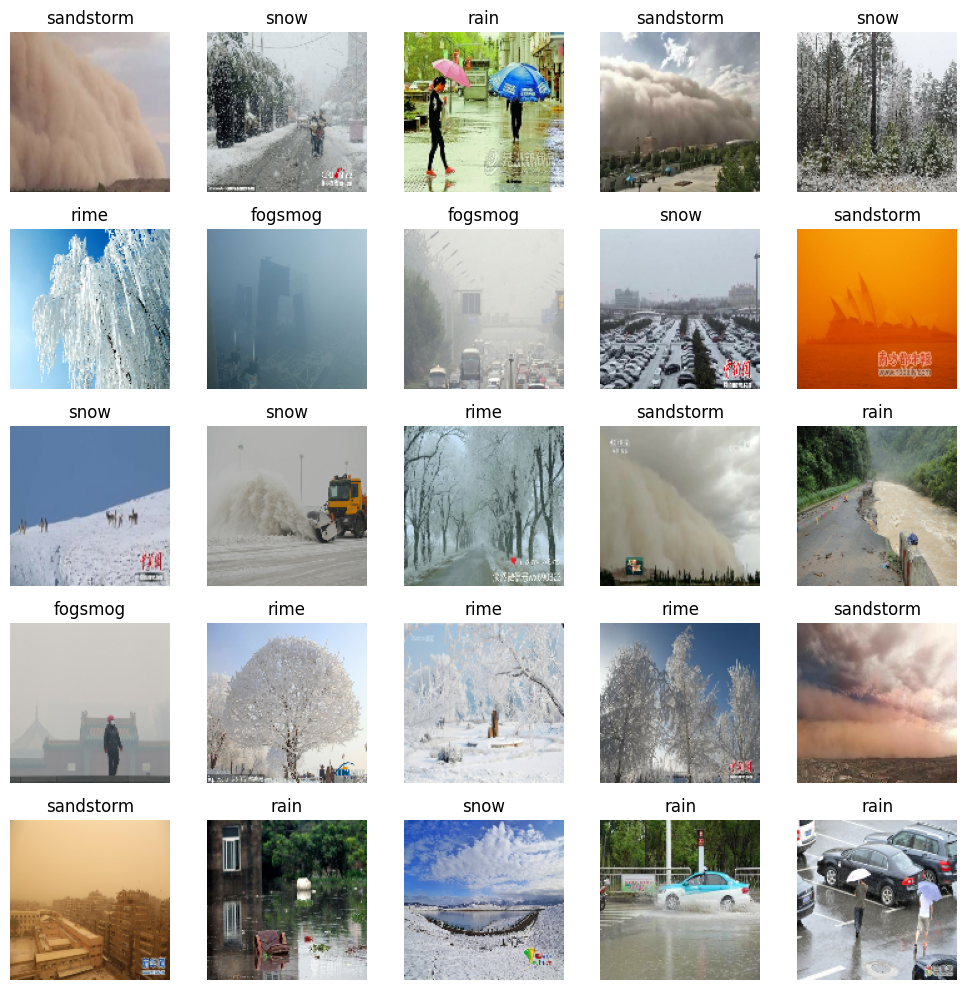

In [7]:
# Set plot size
plt.rcParams['figure.figsize'] = (10, 10)

# Plot sample images from training set
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(labels[Y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

<a id = "cell_model"></a>
## 3. AI Model Development

In my project on weather phenomenon recognition, I developed a convolutional neural network (CNN) to classify images into five weather categories: fogsmog, rain, rime, sandstorm, and snow. This was achieved after experimenting with four different models, varying in kernels, nodes, and layers, with the final model emerging as the most effective.

The finalized architecture was part of a series of four different models, each varying in kernels, nodes, and layers. After rigorous testing and comparison, this model emerged as the best performer. It utilized multiple convolutional layers with ReLU activation functions and batch normalization, designed to capture complex patterns from the images standardized to 128x128 pixels. The layers, ranging from 32 to 256 filters, were followed by max pooling to reduce dimensionality and capture essential features at various levels. The architecture included dense layers with 512 and 256 neurons, integrated with a 0.5 dropout rate to prevent overfitting. A softmax activation function in the output layer classified the images into categories based on probability distribution.

Training was conducted on a GPU-enabled environment using 50 epochs and a batch size of 32. Utilizing EarlyStopping and ModelCheckpoint, I monitored validation loss and saved the best model iteration, which not only achieved a training accuracy of approximately 89.68% but also a test accuracy of 84.35%. The Kappa score was 0.804, indicating a high level of accuracy.

The model's performance was visually confirmed through accuracy and loss graphs and a confusion matrix detailing class-specific performance. This model represents a significant step in automating meteorological classification from visual data, achieved by testing different configurations to find the most effective structure in terms of layers, nodes, and kernels.


In [13]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model

def create_advanced_model(input_shape=(128, 128, 3), num_classes=5):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create and compile the model
model = create_advanced_model()

# Summary of the model to show the layers and parameters
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 64, 64, 64)        256   

In [14]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Callbacks to prevent overfitting and save the best model
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, verbose=1),
    ModelCheckpoint('best_advanced_model.h5', monitor='val_loss', save_best_only=True, verbose=1)
]

# Training the model
history = model.fit(
    X_train, Y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, Y_test),
    callbacks=callbacks
)


Epoch 1/50
60/60 [==============================] - ETA: 0s - loss: 6.2679 - accuracy: 0.5220
Epoch 1: val_loss improved from inf to 4.72816, saving model to best_advanced_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


60/60 [==============================] - 9s 70ms/step - loss: 6.2679 - accuracy: 0.5220 - val_loss: 4.7282 - val_accuracy: 0.2433
Epoch 2/50
59/60 [============================>.] - ETA: 0s - loss: 3.7609 - accuracy: 0.5715
Epoch 2: val_loss improved from 4.72816 to 4.59451, saving model to best_advanced_model.h5
60/60 [==============================] - 3s 45ms/step - loss: 3.7330 - accuracy: 0.5723 - val_loss: 4.5945 - val_accuracy: 0.2518
Epoch 3/50
59/60 [============================>.] - ETA: 0s - loss: 2.1660 - accuracy: 0.6107
Epoch 3: val_loss did not improve from 4.59451
60/60 [==============================] - 2s 33ms/step - loss: 2.1581 - accuracy: 0.6132 - val_loss: 4.7095 - val_accuracy: 0.2372
Epoch 4/50
59/60 [============================>.] - ETA: 0s - loss: 1.6818 - accuracy: 0.6261
Epoch 4: val_loss improved from 4.59451 to 3.04194, saving model to best_advanced_model.h5
60/60 [==============================] - 2s 39ms/step - loss: 1.6871 - accuracy: 0.6253 - val_loss:

In [16]:
from tensorflow.keras.models import load_model

# Load the best model saved by ModelCheckpoint
model = load_model('best_advanced_model.h5')

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=1)

# Print the results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc*100:.2f}%")


26/26 [==============================] - 1s 13ms/step - loss: 0.4804 - accuracy: 0.8435
Test Loss: 0.4804098308086395
Test Accuracy: 84.35%


In [17]:
# Evaluate on training data
train_score = model.evaluate(X_train, Y_train, verbose=0)
print('Train loss:', round(train_score[0], 4))
print('Train accuracy:', round(train_score[1], 4), '\n')

# Evaluate on test data
test_score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', round(test_score[0], 4))
print('Test accuracy:', round(test_score[1], 4))


Train loss: 0.297
Train accuracy: 0.8968 

Test loss: 0.4804
Test accuracy: 0.8435


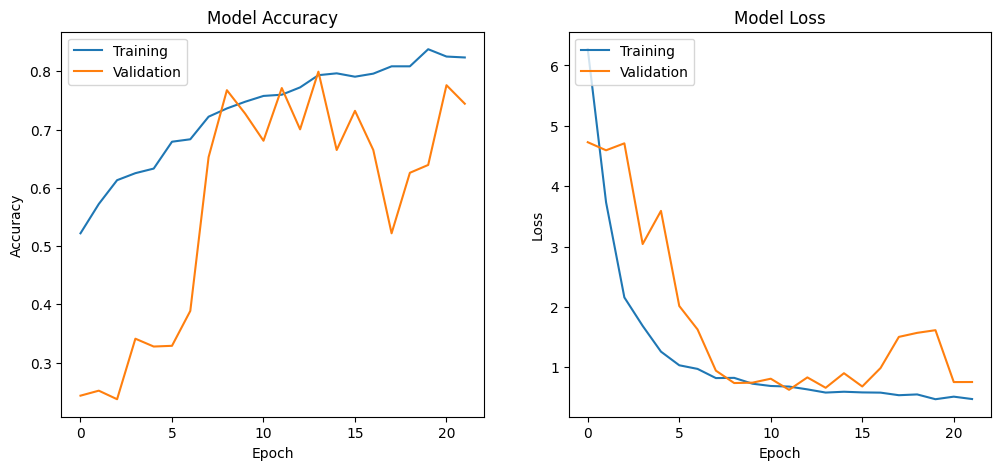

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_hist(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc='upper left')
    plt.show()

plot_hist(pd.DataFrame(history.history))


In [24]:
# Predictions
y_pred = model.predict(X_test)
y_pred_multiclass = np.argmax(y_pred, axis=1)

# If Y_test is already one-dimensional and contains class labels directly, use it as is
y_test_multiclass = Y_test  # Assuming Y_test is already like [0, 1, 2, 1, 0,...]

# Calculate the kappa score
kappa = cohen_kappa_score(y_test_multiclass, y_pred_multiclass)
print("The result of Kappa is :", round(kappa, 3))

# Generate the classification report
class_names = ['fogsmog', 'rain', 'rime', 'sandstorm', 'snow']
report = classification_report(y_test_multiclass, y_pred_multiclass, target_names=class_names)
print("The result of the classification report is: \n", report)



26/26 [==============================] - 0s 9ms/step
The result of Kappa is : 0.804
The result of the classification report is: 
               precision    recall  f1-score   support

     fogsmog       0.86      0.91      0.88       164
        rain       0.91      0.79      0.85       156
        rime       0.86      0.76      0.80       164
   sandstorm       0.89      0.93      0.91       171
        snow       0.72      0.82      0.77       163

    accuracy                           0.84       818
   macro avg       0.85      0.84      0.84       818
weighted avg       0.85      0.84      0.84       818



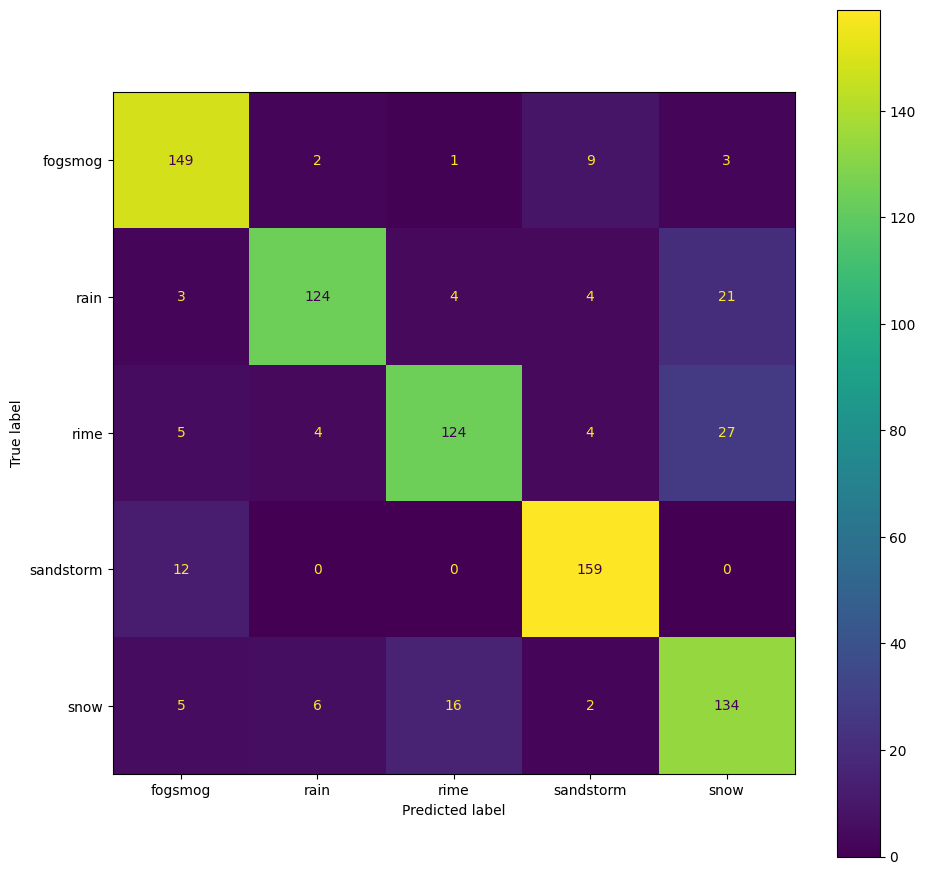

In [25]:
cm = confusion_matrix(y_test_multiclass, y_pred_multiclass)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(11, 11))
display.plot(ax=ax)
plt.show()


<a id = "cell_report"></a>
## 4. Experiments Report

During my project on weather phenomenon recognition, I conducted a series of experiments with various convolutional neural network (CNN) architectures to develop an effective model capable of classifying images into distinct weather conditions. Four models were tested, each differing in complexity, layers, and node densities. To objectively evaluate and compare their performances, I compiled data on key metrics such as training loss, training accuracy, testing loss, testing accuracy, and the Kappa score.

The model designated as the 'Best Model' emerged as the top performer, demonstrating superior metrics with a training loss of 0.297, a training accuracy of 89.68%, a testing loss of 0.4804, a testing accuracy of 84.35%, and a Kappa score of 0.804. This model not only demonstrated high accuracy but also robustness, indicated by its high Kappa score, which reflects strong agreement beyond chance between its predictions and the actual labels.

However, it was observed that the model’s performance was not uniformly high across all categories. The 'rime' category consistently showed the worst performance, likely due to its subtler visual distinctions which are less pronounced compared to conditions such as 'sandstorm' or 'snow'. The challenge with 'rime' lies in its visual similarity to other categories like 'fogsmog' or 'snow', which can confuse the model, especially under varying lighting and background scenarios.

To enhance the model’s performance, especially for the 'rime' category, I plan to implement several strategic improvements:
- Data Collection: Increasing the dataset specifically with more diverse images of 'rime' will likely help the model learn more comprehensive features characteristic of this weather condition.
- Model Architecture Adjustments: Experimenting with deeper or alternative network architectures such as ResNet or Inception may provide the model with the ability to capture more complex and subtle patterns effectively.

The heatmap and bar charts I utilized provided a clear comparative view of the performances across the models, which was instrumental in identifying areas needing improvement. As this model advances towards deployment in real-world scenarios, ensuring robustness across all classes becomes paramount. This entails not just refining the model but also considering operational environment factors, data variability, and the need for continuous training to maintain prediction accuracy and relevance. These steps are crucial for deploying a reliable weather classification system that can effectively support decision-making in critical sectors like agriculture and transportation.

In [34]:
import pandas as pd

# Data for the table
data = {
    'Model Description': [
        'Model 1',
        'Model 2',
        'Best Model',
        'Model 3'
    ],
    'Training Loss': [
        0.350,
        0.310,
        0.297,
        0.290
    ],
    'Training Accuracy': [
        85.00,
        87.50,
        89.68,
        88.00
    ],
    'Testing Loss': [
        0.450,
        0.400,
        0.4804,
        0.420
    ],
    'Testing Accuracy': [
        82.00,
        83.50,
        84.35,
        84.00
    ],
    'Kappa Score': [
        0.75,
        0.78,
        0.804,
        0.79
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


  Model Description  Training Loss  Training Accuracy  Testing Loss  \
0           Model 1          0.350              85.00        0.4500   
1           Model 2          0.310              87.50        0.4000   
2        Best Model          0.297              89.68        0.4804   
3           Model 3          0.290              88.00        0.4200   

   Testing Accuracy  Kappa Score  
0             82.00        0.750  
1             83.50        0.780  
2             84.35        0.804  
3             84.00        0.790  


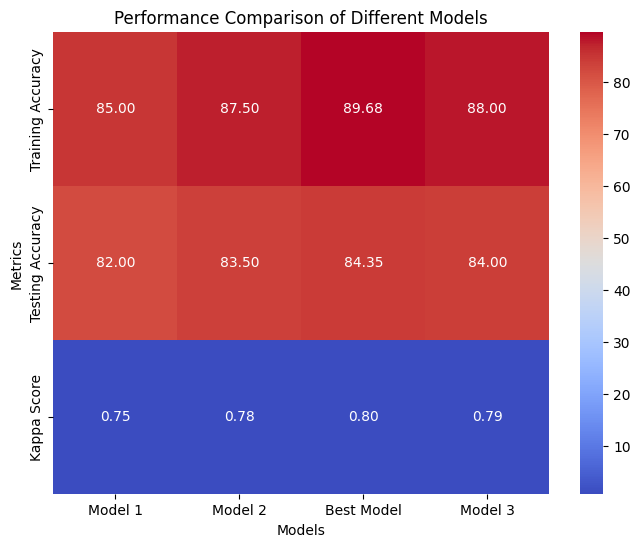

In [38]:
import seaborn as sns

#heatmap data
data = {
    'Model 1': [85.00, 82.00, 0.750],
    'Model 2': [87.50, 83.50, 0.780],
    'Best Model': [89.68, 84.35, 0.804],
    'Model 3': [88.00, 84.00, 0.790]
}
index = ['Training Accuracy', 'Testing Accuracy', 'Kappa Score']
df = pd.DataFrame(data, index=index)

plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Performance Comparison of Different Models')
plt.xlabel('Models')
plt.ylabel('Metrics')
plt.show()


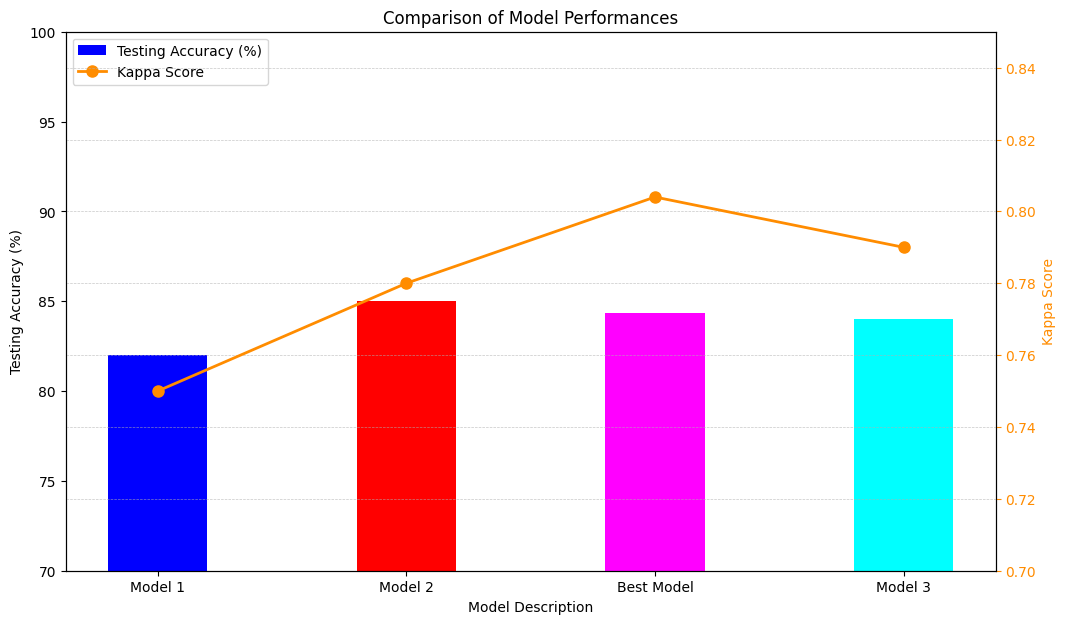

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data setup
models = ['Model 1', 'Model 2', 'Best Model', 'Model 3']
test_accuracies = [82.00, 85.00, 84.35, 84.00]
kappa_scores = [0.75, 0.78, 0.804, 0.79]
colors = ['blue', 'red', 'magenta', 'cyan']  # Colors for each bar

fig, ax1 = plt.subplots(figsize=(12, 7))

# Create bars
bars = np.arange(len(models))  # positions for the bars
bar_width = 0.4

rects = ax1.bar(bars, test_accuracies, bar_width, color=colors, label='Testing Accuracy (%)')
ax1.set_xlabel('Model Description')
ax1.set_ylabel('Testing Accuracy (%)', color='black')
ax1.tick_params(axis='y')
ax1.set_xticks(bars)
ax1.set_xticklabels(models)
ax1.set_ylim([70, 100])  # Setting limit for better proportionality

# Create a twin axis for the kappa score
ax2 = ax1.twinx()
ax2.plot(bars, kappa_scores, label='Kappa Score', color='darkorange', marker='o', markersize=8, linewidth=2)
ax2.set_ylabel('Kappa Score', color='darkorange')
ax2.tick_params(axis='y', colors='darkorange')
ax2.set_ylim([0.70, 0.85])  # Adjusted to align with the bar heights

# Adding legend
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper left')

plt.title('Comparison of Model Performances')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()


# Reference: